In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot


In [58]:
data = pd.read_csv('https://github.com/limperstickhelp23/Credit_Fraud_Detection/blob/1e583fb73944ba26fdb040d3590a4672578c4676/DataSets/fraud_test.csv?raw=True', index_col=0)

In [59]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [60]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Text(0, 0.5, 'Frequency')

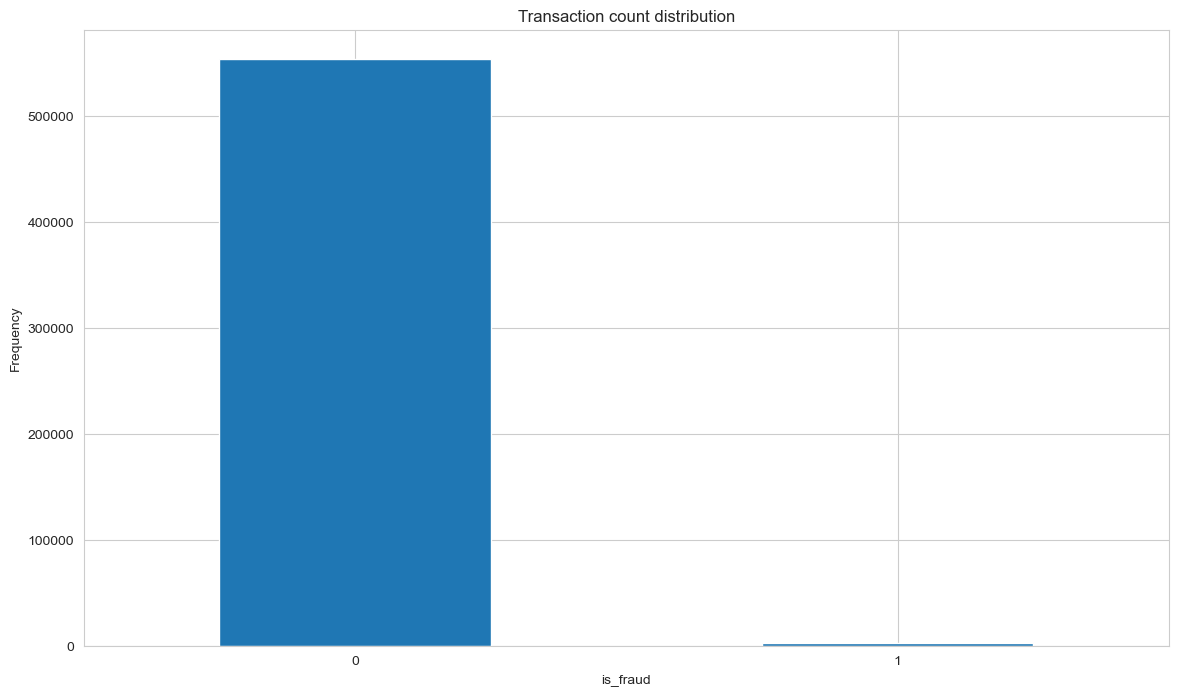

In [61]:
#Determine number of transactions in dataset 
transaction = pd.value_counts(data['is_fraud'], sort=True)
transaction.plot(kind='bar', rot=0)
plt.title('Transaction count distribution')
plt.ylabel('Frequency')

In [62]:
Real = data[data['is_fraud'] == 0]
Fraud = data[data['is_fraud'] == 1]

Real['amt'].describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

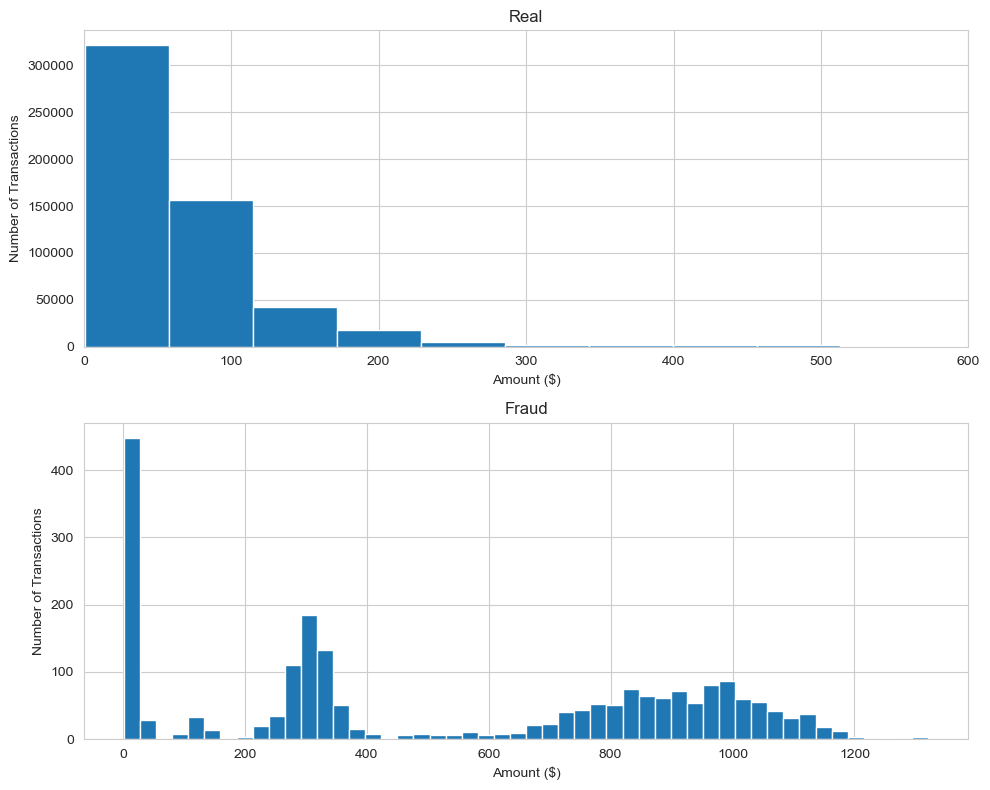

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
bins = 60

axes[0].hist(Real['amt'], bins=400)
axes[0].set_title('Real')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xlim([0, 600])
axes[0].set_xlabel('Amount ($)')
axes[1].hist(Fraud['amt'], bins=50)
axes[1].set_title('Fraud')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_xlabel('Amount ($)')
plt.tight_layout()


Fraudulent Transactions occur in smaller amounts compare to Real ones but in higher cash amounts than the real ones.

In [64]:
import plotly
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [65]:
#
trace = go.Scatter(
    x = Fraud['trans_date_trans_time'],
    y = Fraud['amt'],
    mode = 'markers'
)

plotly.offline.iplot({
    "data": trace
})


Based on the above plot the Fraudulent transactions occur at random times and hence we can conclude there is no relation here to be explored.

In [66]:
y = data['is_fraud']
X = data.drop(['is_fraud'],axis=1)

X_modified = X.drop(['street','city','state','cc_num', 'unix_time', 'trans_num'], axis=1)
X_modified[['date', 'time']] = X_modified['trans_date_trans_time'].str.split(' ', expand=True)
X_modified[['day', 'month', 'year']] = X_modified['date'].str.split('/', expand=True)
X_modified['time'] = X_modified['time'].apply(lambda x: x.split(':')[0])
X_modified['dob'] = X_modified['dob'].apply(lambda x: x.split('/')[-1])
X_modified["gender"] = X_modified["gender"].replace({'M': 0, 'F': 1})
X_modified = X_modified.drop(['trans_date_trans_time','date'], axis=1)
X_modified['is_fraud'] = y
X_modified.head()

,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,time,day,month,year,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,0,29209,33.9659,-80.9355,333497,Mechanical engineer,1968,33.986391,-81.200714,12,21,06,2020,0
1,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,1,84002,40.3207,-110.4360,302,"Sales professional, IT",1990,39.450498,-109.960431,12,21,06,2020,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,1,11710,40.6729,-73.5365,34496,"Librarian, public",1970,40.495810,-74.196111,12,21,06,2020,0
3,fraud_Haley Group,misc_pos,60.05,Brian,Williams,0,32780,28.5697,-80.8191,54767,Set designer,1987,28.812398,-80.883061,12,21,06,2020,0
4,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,0,49632,44.2529,-85.0170,1126,Furniture designer,1955,44.959148,-85.884734,12,21,06,2020,0


In [ ]:
used_data = X_modified.copy()

features = used_data.select_dtypes(np.object_).columns
cat_features = []
for feature in features:
    used_data[feature] = used_data[feature].astype('category')
    cat_features.append(feature)
    


In [67]:


X_train, X_test, y_train, y_test = train_test_split(used_data.drop('is_fraud', axis=1),
                                                    used_data['is_fraud'],
                                                    stratify=used_data['is_fraud'],
                                                    test_size=0.5)
train_data = X_train.copy()
train_data['is_fraud'] = y_train

train_data.head()

,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,time,day,month,year,is_fraud
548730,fraud_Reilly LLC,home,87.59,Connie,Carroll,1,38740,34.0470,-90.7652,466,Trading standards officer,1955,33.932616,-91.310279,22,29,12,2020,0
232513,fraud_Rutherford-Mertz,grocery_pos,138.15,Carolyn,Thomas,1,62266,38.4857,-89.6816,254,Magazine journalist,1952,38.828862,-89.046581,08,13,09,2020,0
387445,fraud_Conroy-Emard,food_dining,30.76,Mary,Wall,1,7060,40.6152,-74.4150,71485,Leisure centre manager,1974,40.083837,-74.975417,21,19,11,2020,0
31536,fraud_Homenick LLC,personal_care,8.69,Ashley,Blanchard,1,33417,26.7197,-80.1248,459921,Historic buildings inspector/conservation officer,1960,27.488683,-79.869813,19,01,07,2020,0
215902,fraud_Reynolds-Schinner,misc_pos,1.93,Steven,Faulkner,0,14425,42.9580,-77.3083,10717,Cytogeneticist,1952,43.466526,-77.093698,03,06,09,2020,0


Time was considered a categorical varaible when doing target encoding becasue it was 24 hours in a day. Therefore it was standarized to allow us to make a descion. This code was taken with a mix of our previous preprocessing to encode and also actually understand the data.

In [68]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
train_data[cat_features] = target_encoder.fit_transform(train_data[cat_features], train_data["is_fraud"])
train_data.head()

,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,time,day,month,year,is_fraud
548730,0.000000,0.001069,87.59,1.448963e-11,0.000000e+00,1,38740,34.0470,-90.7652,466,0.000000e+00,0.002662,33.932616,-91.310279,0.019411,0.001558,0.001745,0.003858,0
232513,0.004090,0.008594,138.15,0.000000e+00,0.000000e+00,1,62266,38.4857,-89.6816,254,7.848359e-07,0.007499,38.828862,-89.046581,0.000334,0.003689,0.004793,0.003858,0
387445,0.002770,0.001480,30.76,5.984611e-03,0.000000e+00,1,7060,40.6152,-74.4150,71485,0.000000e+00,0.001648,40.083837,-74.975417,0.001067,0.003792,0.004402,0.003858,0
31536,0.005249,0.001583,8.69,2.481390e-03,9.712691e-12,1,33417,26.7197,-80.1248,459921,5.604484e-03,0.003376,27.488683,-79.869813,0.000781,0.003293,0.003556,0.003858,0
215902,0.002959,0.001978,1.93,2.834008e-03,8.595989e-03,0,14425,42.9580,-77.3083,10717,3.561888e-03,0.007499,43.466526,-77.093698,0.009952,0.003762,0.004793,0.003858,0


In [69]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data["is_fraud"]
X_test[cat_features] = target_encoder.transform(X_test[cat_features])
X_test.head()

,merchant,category,amt,first,last,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,time,day,month,year
314675,0.001832,0.002623,80.66,0.001439,0.006925,0,76248,32.9276,-97.2489,95035,0.000000,0.002732,33.241902,-97.861527,0.009632,0.003792,0.005699,0.003858
40121,0.000000,0.001069,76.05,0.001538,0.001538,1,80120,39.5994,-105.0044,320420,0.006226,0.002815,39.048262,-105.750737,0.000428,0.007118,0.003556,0.003858
125220,0.014599,0.012013,5.11,0.001522,0.000000,0,29455,32.8357,-79.8217,20478,0.000000,0.003762,32.589015,-80.264649,0.001067,0.004136,0.004547,0.003858
347565,0.011990,0.012013,114.71,0.001888,0.000000,0,40077,38.4921,-85.4524,564,0.005659,0.000000,38.975015,-85.744026,0.000428,0.003443,0.004402,0.003858
162879,0.016129,0.012013,4.72,0.004603,0.002943,0,46765,41.2249,-85.0301,5341,0.000000,0.006970,42.089878,-84.775516,0.000428,0.003667,0.004547,0.003858


In [77]:
y_test.head()

314675    0
40121     0
125220    0
347565    0
162879    0
Name: is_fraud, dtype: int64

In [70]:
# X_test.to_csv('X_test.csv')
# X_train.to_csv('X_train.csv')
# y_train.to_csv('y_train.csv')
# y_test.to_csv('y_test.csv')

C:\Users\jacob\AppData\Local\Temp\ipykernel_5296\2225873963.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\jacob\AppData\Local\Temp\ipykernel_5296\2225873963.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Density distribution of Fraud data')

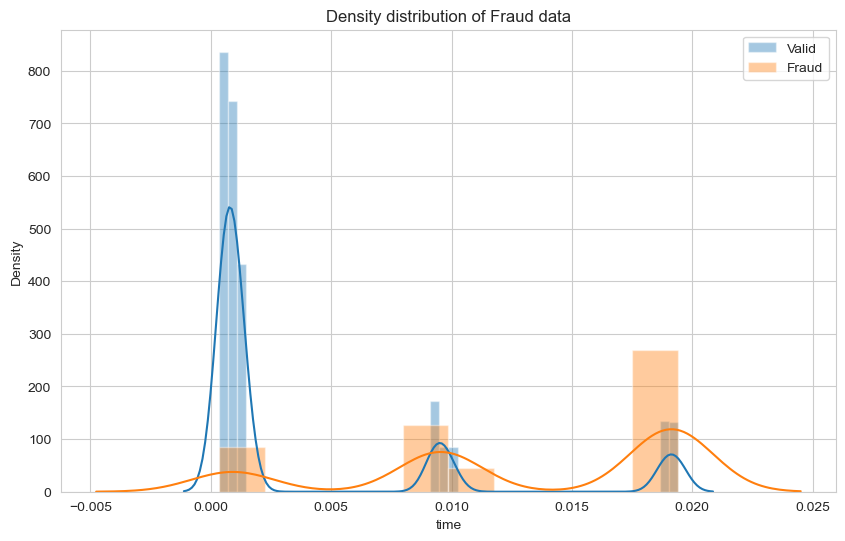

In [75]:
plt.figure(figsize=(10, 6))
sns.distplot(train_data.loc[train_data['is_fraud'] == 0]["time"], hist=True, label='Valid')
sns.distplot(train_data.loc[train_data['is_fraud'] == 1]["time"], hist=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Density distribution of Fraud data")